# Vehicle classification EDA

In [ ]:
import numpy as np 
import pandas as pd 

import os 
for dirname, _,filenames in os.walk('D:/Computer Vision/data/vehicle-classification-dataset/train/train'):
    print(dirname)

In [2]:
train_dir = 'D:/Computer Vision/data/vehicle-classification-dataset/train/train'
test_dir = 'D:/Computer Vision/data/vehicle-classification-dataset/test/testset'

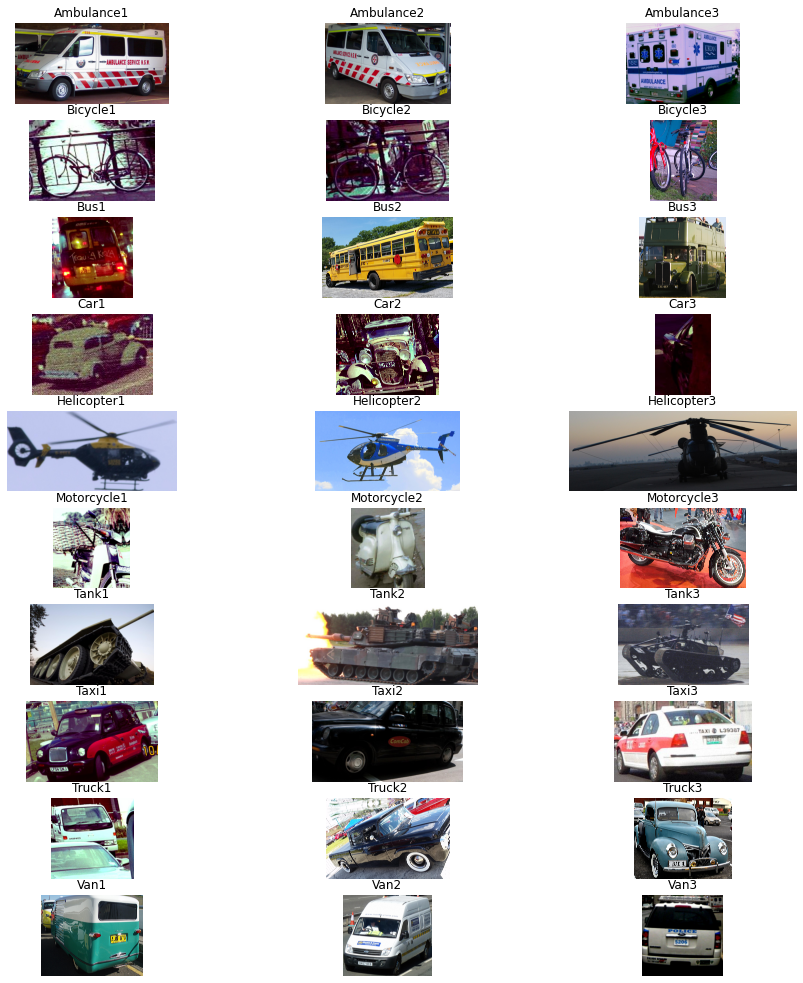

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


row = 0 
fig = plt.figure(figsize=(15,30))
for dirname, _, filenames in os.walk(train_dir):
    if len(filenames)==0:
        continue
    for i in range(3):
        sp = plt.subplot(17,3,row*3+i+1)
        category = dirname.split('\\')[-1]
        sp.set_title(category+str(i+1))
        sp.axis('off')
        img_data = mpimg.imread(dirname+'/'+filenames[i])
        plt.imshow(img_data)
    row += 1

In [ ]:
img_test = []
for dirname, _, filenames in os.walk(test_dir):
    if len(filenames)==0:
        continue
    for filename in filenames:
        img_test.append(dirname+'/'+filename)
    
img_test[:5]

In [5]:
len(img_test)

7958

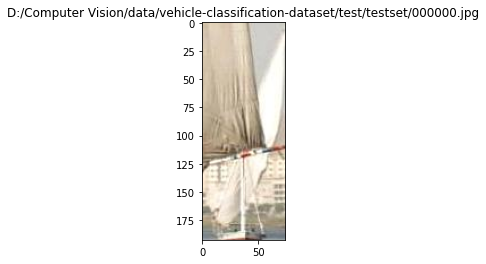

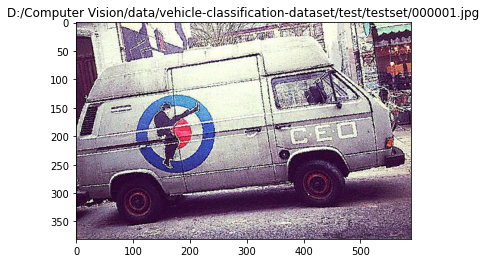

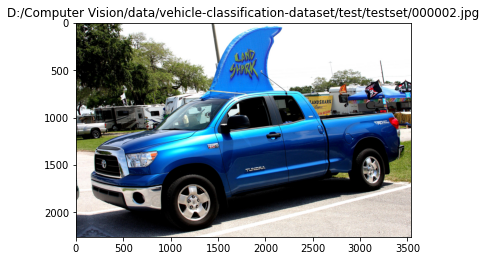

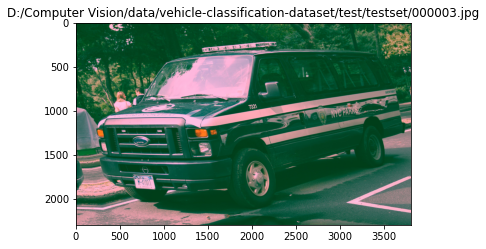

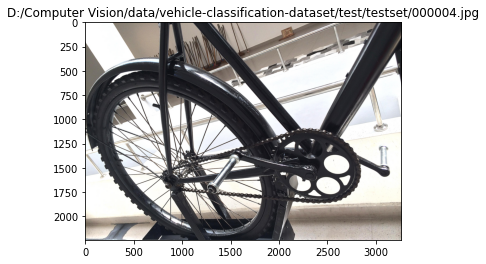

In [6]:
import matplotlib.image as img

len_img = len(img_test)
i = 0

for i in range(len_img):
    if i < 5:
        img_data = img.imread(img_test[i])
        plt.imshow(img_data)
        axis = plt.gca()
        axis.set_title(img_test[i])
        plt.show()
        i += 1
    else:
        break

In [7]:
# Well, we can see that the images are not of the same size.
# We will also normalize the pixel values to be between 0 and 1

# Create a generator to read images from dataset directory
# And resize them
# Normalize the images

img_list = []
label_list = []
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        img = dirname + '\\' + filename
        img_list.append(img)
        label_list.append(dirname.split("\\")[-1])
data = pd.DataFrame({'image':img_list,'label':label_list})

In [8]:
data.head()

,image,label
0,D:/Computer Vision/data/vehicle-classification...,Ambulance
1,D:/Computer Vision/data/vehicle-classification...,Ambulance
2,D:/Computer Vision/data/vehicle-classification...,Ambulance
3,D:/Computer Vision/data/vehicle-classification...,Ambulance
4,D:/Computer Vision/data/vehicle-classification...,Ambulance


In [9]:
len_data = len(data)
print(f'There are {len_data} images in the dataset')

There are 18416 images in the dataset


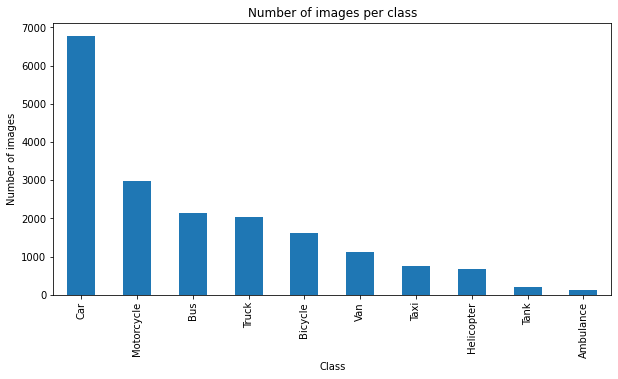

In [10]:
data['label'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of images per class')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()

In [11]:
data['label'].value_counts()

Car           6781
Motorcycle    2986
Bus           2133
Truck         2033
Bicycle       1618
Van           1111
Taxi           748
Helicopter     668
Tank           206
Ambulance      132
Name: label, dtype: int64

In [14]:
# Look like the dataset is imbalance 
# There are 8695 images in Boat class while there are only 51 images in Cart

In [15]:
import os 
from collections import defaultdict
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

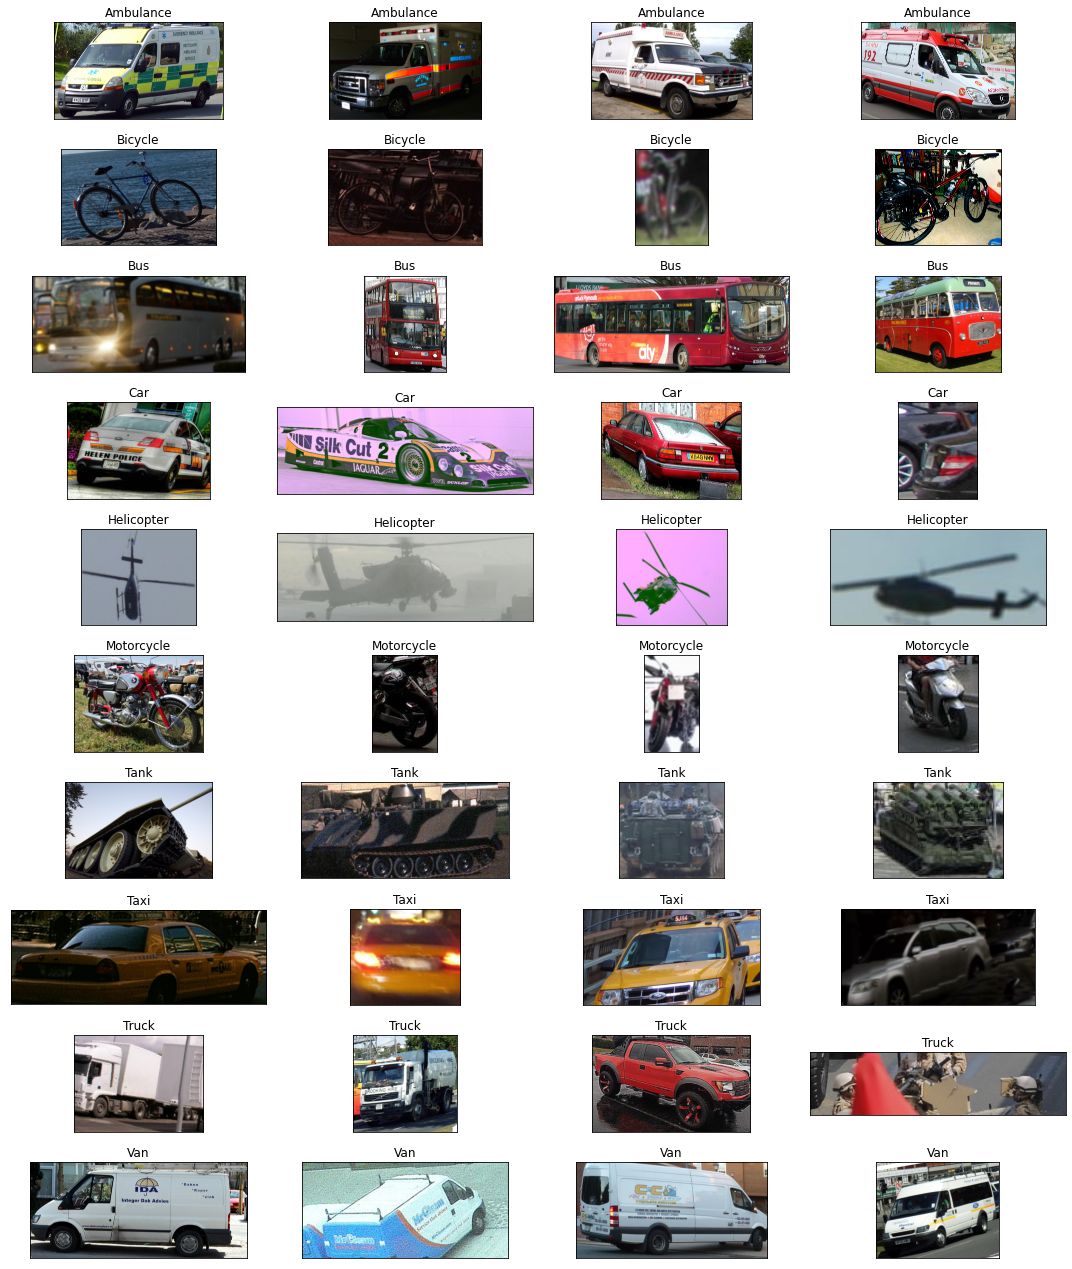

In [16]:
fig = plt.figure(figsize=(15,30))
for num, category in enumerate(sorted(data['label'].unique())):
    for i, (idx, row) in enumerate(data.loc[data['label']==category].sample(4).iterrows()):
        ax = fig.add_subplot(17, 4, num*4+i+1, xticks=[], yticks=[])
        im = Image.open(row['image'])
        plt.imshow(im)
        ax.set_title(category)
fig.tight_layout()
plt.show()